In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly as pl
import seaborn as sns
import datetime as dt

In [2]:
df = pd.read_csv('Crashes.csv', low_memory=False)
df['Crash_Date'] = pd.to_datetime(df['Crash_Date'])

df2 = pd.read_csv('Vehicle.csv', low_memory=False)


In [3]:
df3 = df2.merge(df, on='Crash_ID', how = 'left' )

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6954307 entries, 0 to 6954306
Data columns (total 34 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   Crash_ID               int64         
 1   Crash_Fatal_Fl         object        
 2   Schl_Bus_Fl            object        
 3   Rr_Relat_Fl            object        
 4   Medical_Advisory_Fl    object        
 5   Crash_Date             datetime64[ns]
 6   Crash_Time             object        
 7   Rpt_CRIS_Cnty_ID       object        
 8   Thousand_Damage_Fl     object        
 9   Rpt_Rdwy_Sys_ID        object        
 10  Rpt_Hwy_Num            object        
 11  Crash_Speed_Limit      int64         
 12  Road_Constr_Zone_Fl    object        
 13  Wthr_Cond_ID           object        
 14  Light_Cond_ID          object        
 15  Road_Type_ID           float64       
 16  Surf_Cond_ID           object        
 17  Harm_Evnt_ID           object        
 18  Obj_Struck_ID         

In [5]:
palette = sns.color_palette("husl", 8)

In [6]:
df['year'] = df['Crash_Date'].dt.year
df

,Crash_ID,Crash_Fatal_Fl,Schl_Bus_Fl,Rr_Relat_Fl,Medical_Advisory_Fl,Crash_Date,Crash_Time,Rpt_CRIS_Cnty_ID,Thousand_Damage_Fl,Rpt_Rdwy_Sys_ID,...,Rural_Urban_Type_ID,Sus_Serious_Injry_Cnt,Nonincap_Injry_Cnt,Poss_Injry_Cnt,Non_Injry_Cnt,Unkn_Injry_Cnt,Tot_Injry_Cnt,Death_Cnt,Damaged_Property,year
0,11152318,N,N,N,N,2010-01-19,10:02 AM,MIDLAND,Y,"LOCAL ROAD/STREET (STREET, ROAD, AVE., BLVD., PL.",...,NaN,0,0,0,3,0,0,0,NaN,2010
1,11152319,N,N,N,N,2010-01-19,11:30 AM,MIDLAND,Y,BUSINESS STATE,...,3.0,0,0,0,7,0,0,0,NaN,2010
2,11152320,N,N,N,N,2010-01-19,04:36 PM,MIDLAND,Y,"LOCAL ROAD/STREET (STREET, ROAD, AVE., BLVD., PL.",...,NaN,1,0,0,3,0,1,0,NaN,2010
3,11152327,N,N,N,N,2010-01-23,01:53 PM,TARRANT,N,"LOCAL ROAD/STREET (STREET, ROAD, AVE., BLVD., PL.",...,NaN,0,0,0,1,0,0,0,NaN,2010
4,11152328,N,N,N,N,2010-01-24,10:55 PM,COLLIN,Y,COUNTY ROAD,...,NaN,0,0,0,2,0,0,0,NaN,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6954302,18811351,N,N,N,N,2021-12-19,06:15 AM,HARRIS,Y,US HIGHWAY,...,NaN,0,0,0,1,1,0,0,NaN,2021
6954303,18813691,N,N,N,N,2021-12-24,05:03 PM,TRAVIS,Y,"LOCAL ROAD/STREET (STREET, ROAD, AVE., BLVD., PL.",...,4.0,0,0,1,1,0,1,0,NaN,2021
6954304,18813792,N,N,N,N,2021-12-12,09:20 PM,HARRIS,Y,"LOCAL ROAD/STREET (STREET, ROAD, AVE., BLVD., PL.",...,NaN,0,0,0,2,0,0,0,NaN,2021
6954305,18816663,N,N,N,N,2021-12-15,09:08 PM,SHELBY,Y,"LOCAL ROAD/STREET (STREET, ROAD, AVE., BLVD., PL.",...,2.0,0,0,0,1,1,0,0,NaN,2021


In [7]:
df3['year'] = df3['Crash_Date'].dt.year

In [8]:
vehicle = df3[df3['Prsn_Nbr'] == 1]
vehicle = vehicle.groupby('year')['Veh_Body_Styl_ID'].value_counts()
vehicledf = pd.DataFrame(vehicle)
vehicledf = vehicledf.rename(columns = {'Veh_Body_Styl_ID': 'Count'})
vehicledf.to_excel('Veh.xlsx')

<AxesSubplot:xlabel='year', ylabel='Count'>

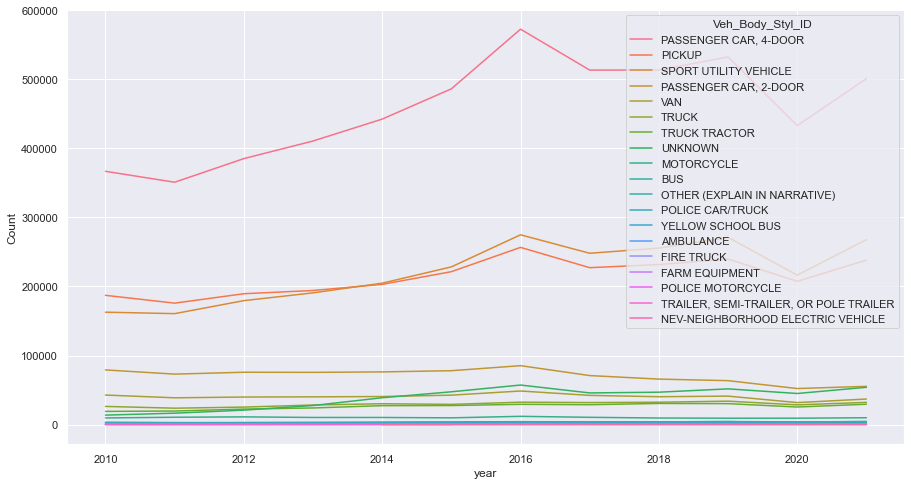

In [9]:
sns.set(rc = {'figure.figsize':(15,8)})
veh = sns.lineplot(data=vehicledf, y = 'Count', x='year', hue='Veh_Body_Styl_ID')
plt.savefig('Vehtype_byyear.png')
veh

In [10]:
df3

,Crash_ID,Unit_Nbr,Prsn_Nbr,Veh_Dmag_Area_1_ID,Veh_Body_Styl_ID,Crash_Fatal_Fl,Schl_Bus_Fl,Rr_Relat_Fl,Medical_Advisory_Fl,Crash_Date,...,Rural_Urban_Type_ID,Sus_Serious_Injry_Cnt,Nonincap_Injry_Cnt,Poss_Injry_Cnt,Non_Injry_Cnt,Unkn_Injry_Cnt,Tot_Injry_Cnt,Death_Cnt,Damaged_Property,year
0,11232288,1,2,NaN,NaN,N,N,N,N,2010-03-24,...,NaN,0,0,1,2,0,1,0,NaN,2010
1,11239108,1,2,NaN,NaN,N,N,N,N,2010-03-18,...,4.0,0,0,3,2,0,3,0,NaN,2010
2,11239108,3,2,NaN,NaN,N,N,N,N,2010-03-18,...,4.0,0,0,3,2,0,3,0,NaN,2010
3,11239848,1,2,NaN,NaN,N,N,N,N,2010-03-18,...,1.0,0,0,1,2,0,1,0,NaN,2010
4,11240049,1,2,NaN,NaN,N,N,N,N,2010-03-18,...,NaN,0,0,0,4,0,0,0,NaN,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19047548,18813792,1,1,DISTRIBUTED LEFT SIDE DAMAGE PARALLEL IMPACT,"PASSENGER CAR, 4-DOOR",N,N,N,N,2021-12-12,...,NaN,0,0,0,2,0,0,0,NaN,2021
19047549,18813792,2,1,RIGHT FRONT QUARTER DAMAGE ANGULAR IMPACT,"PASSENGER CAR, 4-DOOR",N,N,N,N,2021-12-12,...,NaN,0,0,0,2,0,0,0,NaN,2021
19047550,18816663,1,1,BACK END (LEFT) DAMAGE PARTIAL CONTACT,"PASSENGER CAR, 4-DOOR",N,N,N,N,2021-12-15,...,2.0,0,0,0,1,1,0,0,NaN,2021
19047551,18816663,2,1,FRONT END DAMAGE CONCENTRATED IMPACT,PICKUP,N,N,N,N,2021-12-15,...,2.0,0,0,0,1,1,0,0,NaN,2021


In [11]:
susser = df3.groupby(['year','Veh_Body_Styl_ID'])['Sus_Serious_Injry_Cnt'].sum()
susser.to_excel('susser.xlsx')

In [12]:
totinj = df3.groupby(['year','Veh_Body_Styl_ID'])['Tot_Injry_Cnt'].sum()
totinj.to_excel('totalinj.xlsx')

In [13]:
deathc = df3.groupby(['year','Veh_Body_Styl_ID'])['Death_Cnt'].sum()
deathc.to_excel('death.xlsx')

In [14]:
countyveh = df3.groupby(['year','Veh_Body_Styl_ID'])['Rpt_CRIS_Cnty_ID'].value_counts()
countyveh.to_excel('Countyveh.xlsx')

In [15]:
countyy = df3[df3['Prsn_Nbr'] == 1]
countyy = countyy.groupby('year')['Rpt_CRIS_Cnty_ID'].value_counts()
countyy.to_excel('Countyy.xlsx')

In [16]:
county = df3[df3['Prsn_Nbr'] == 1]
county = county['Rpt_CRIS_Cnty_ID'].value_counts()
county.to_excel('County.xlsx')


In [17]:
injury = df3.groupby('year')[['Sus_Serious_Injry_Cnt','Tot_Injry_Cnt', 'Death_Cnt', 'Non_Injry_Cnt']].sum()
injury.to_excel('Injury.xlsx')

In [18]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19047553 entries, 0 to 19047552
Data columns (total 39 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   Crash_ID               int64         
 1   Unit_Nbr               int64         
 2   Prsn_Nbr               int64         
 3   Veh_Dmag_Area_1_ID     object        
 4   Veh_Body_Styl_ID       object        
 5   Crash_Fatal_Fl         object        
 6   Schl_Bus_Fl            object        
 7   Rr_Relat_Fl            object        
 8   Medical_Advisory_Fl    object        
 9   Crash_Date             datetime64[ns]
 10  Crash_Time             object        
 11  Rpt_CRIS_Cnty_ID       object        
 12  Thousand_Damage_Fl     object        
 13  Rpt_Rdwy_Sys_ID        object        
 14  Rpt_Hwy_Num            object        
 15  Crash_Speed_Limit      int64         
 16  Road_Constr_Zone_Fl    object        
 17  Wthr_Cond_ID           object        
 18  Light_Cond_ID       

In [19]:
fips = pd.read_excel('County Fips.xlsx')
fips = pd.DataFrame(fips)
df3 = df3.merge(fips, how= 'left', left_on = 'Rpt_CRIS_Cnty_ID', right_on= 'County' )
df3

,Crash_ID,Unit_Nbr,Prsn_Nbr,Veh_Dmag_Area_1_ID,Veh_Body_Styl_ID,Crash_Fatal_Fl,Schl_Bus_Fl,Rr_Relat_Fl,Medical_Advisory_Fl,Crash_Date,...,Nonincap_Injry_Cnt,Poss_Injry_Cnt,Non_Injry_Cnt,Unkn_Injry_Cnt,Tot_Injry_Cnt,Death_Cnt,Damaged_Property,year,County,Fips
0,11232288,1,2,NaN,NaN,N,N,N,N,2010-03-24,...,0,1,2,0,1,0,NaN,2010,TRAVIS,48453.0
1,11239108,1,2,NaN,NaN,N,N,N,N,2010-03-18,...,0,3,2,0,3,0,NaN,2010,DENTON,48121.0
2,11239108,3,2,NaN,NaN,N,N,N,N,2010-03-18,...,0,3,2,0,3,0,NaN,2010,DENTON,48121.0
3,11239848,1,2,NaN,NaN,N,N,N,N,2010-03-18,...,0,1,2,0,1,0,NaN,2010,RED RIVER,48387.0
4,11240049,1,2,NaN,NaN,N,N,N,N,2010-03-18,...,0,0,4,0,0,0,NaN,2010,HAYS,48209.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19047548,18813792,1,1,DISTRIBUTED LEFT SIDE DAMAGE PARALLEL IMPACT,"PASSENGER CAR, 4-DOOR",N,N,N,N,2021-12-12,...,0,0,2,0,0,0,NaN,2021,HARRIS,48201.0
19047549,18813792,2,1,RIGHT FRONT QUARTER DAMAGE ANGULAR IMPACT,"PASSENGER CAR, 4-DOOR",N,N,N,N,2021-12-12,...,0,0,2,0,0,0,NaN,2021,HARRIS,48201.0
19047550,18816663,1,1,BACK END (LEFT) DAMAGE PARTIAL CONTACT,"PASSENGER CAR, 4-DOOR",N,N,N,N,2021-12-15,...,0,0,1,1,0,0,NaN,2021,SHELBY,48419.0
19047551,18816663,2,1,FRONT END DAMAGE CONCENTRATED IMPACT,PICKUP,N,N,N,N,2021-12-15,...,0,0,1,1,0,0,NaN,2021,SHELBY,48419.0


In [20]:
weather = df.groupby('year')['Wthr_Cond_ID'].value_counts()
weather.to_excel('Weather.xlsx')

In [22]:
pop = df.groupby('year')['Pop_Group_ID'].value_counts()
pop.to_excel('Pop.xlsx')

In [34]:
harm = df.groupby('year')['Harm_Evnt_ID'].value_counts()
harm.to_excel('Harm.xlsx')